In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re
from datetime import datetime

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [2]:
train_data=pd.read_csv("C:/Users/hp/OneDrive/Data Analytix/Python/Practice/Titanic/train.csv")
test_data=pd.read_csv("C:/Users/hp/OneDrive/Data Analytix/Python/Practice/Titanic/test.csv")
gender_submission=pd.read_csv("C:/Users/hp/OneDrive/Data Analytix/Python/Practice/Titanic/gender_submission.csv")


In [3]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#merging gender and test table
gender_test=pd.merge(test_data,gender_submission,on=['PassengerId'])
gender_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [5]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# Merging the created dataframe 'gender_test' to the existing dataframe 'train_data'
data = pd.concat([train_data, gender_test])
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
data.shape
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [8]:
#replacing missign values in age column with mean
data['Age'].fillna(data['Age'].mean(),inplace=True)
#removing the cabin column
data.drop('Cabin',axis=1,inplace=True)
#replacing missing values in embarked with value that has occurred most
data["Embarked"] = data["Embarked"].fillna("S")
#Removing one row where fare value is missing
data.dropna(subset=["Fare"],axis=0 , inplace=True)


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1308.0,654.702599,378.011421,1.00,327.7500,654.500000,981.250,1309.0000
Survived,1308.0,0.377676,0.484991,0.00,0.0000,0.000000,1.000,1.0000
Pclass,1308.0,2.294343,0.837929,1.00,2.0000,3.000000,3.000,3.0000
Age,1308.0,29.857729,12.860241,0.17,22.0000,29.881138,35.000,80.0000
SibSp,1308.0,0.499235,1.041965,0.00,0.0000,0.000000,1.000,8.0000
Parch,1308.0,0.385321,0.865826,0.00,0.0000,0.000000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.454200,31.275,512.3292


In [10]:
#The data type of 'Sex' is an object, which will not be visible in a correlation. I would like to include the values of the column 'Sex' into the correlation matrix by creating a new column 'Sex_Number' and set the value 'female' to '1' and 'male' to '0'
data['Sex_Number']=data['Sex'].map({'male':1,'female':0})
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


<AxesSubplot:>

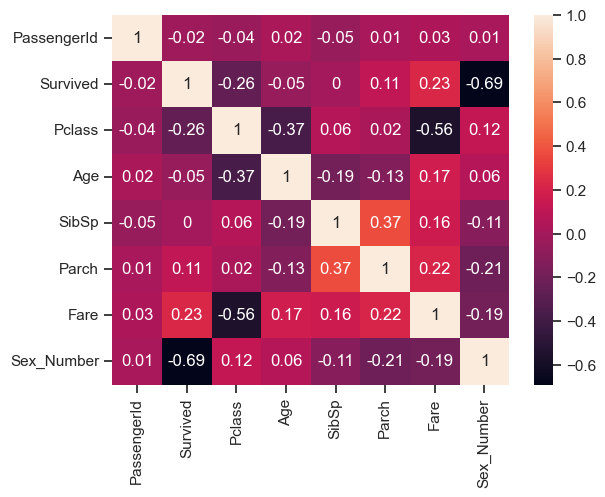

In [11]:
corr_matrix=pd.DataFrame(data.corr())
corr_matrix=corr_matrix.round(decimals=2)
sns.heatmap(corr_matrix, annot=True)


In [12]:
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,S,1
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,1
416,1308,0,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,S,1


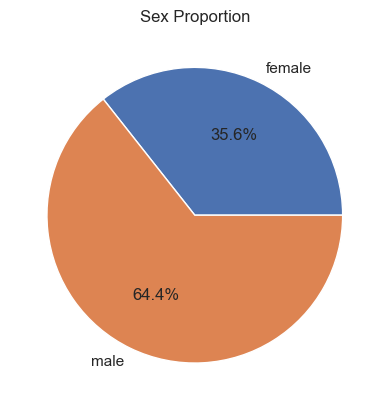

In [13]:
#Sex Proportion
sex_prop=pd.DataFrame(data.groupby('Sex')['PassengerId'].count().reset_index())
plt.pie(sex_prop.PassengerId,labels=sex_prop.Sex,autopct='%1.1f%%')
plt.title('Sex Proportion')
plt.show()

<AxesSubplot:xlabel='Survived'>

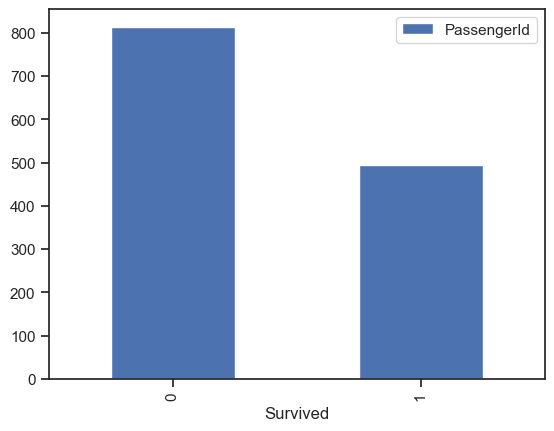

In [14]:
#survived V not survived
sns=pd.DataFrame(data.groupby('Survived')['PassengerId'].count().reset_index())
sns
sns.plot.bar(x='Survived',y='PassengerId')


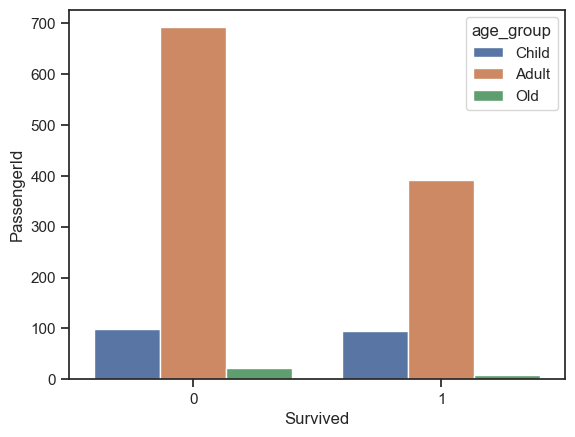

In [18]:
bins=[0,18,60,100]
labels=['Child','Adult','Old']
data['age_group']=pd.cut(data['Age'],bins,labels=labels)
surv=pd.DataFrame(data.groupby(['Survived','age_group'])['PassengerId'].count().reset_index())
surv
sns.barplot(x=surv['Survived'],y=surv['PassengerId'],hue=surv["age_group"],data=surv)
plt.show()



<AxesSubplot:xlabel='Survived', ylabel='Age'>

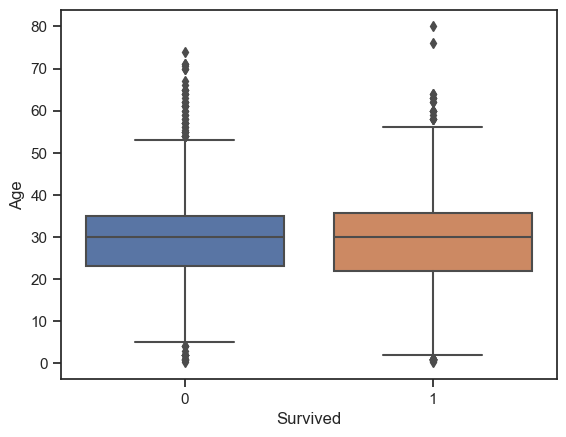

In [19]:
#Age Distrbution based on survived and not survived usign box plot
sns.boxplot(x=data['Survived'],y=data['Age'],data=data)


In [17]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Number,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,S,1,Adult
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,0,Adult
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,1,Adult
416,1308,0,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,S,1,Adult


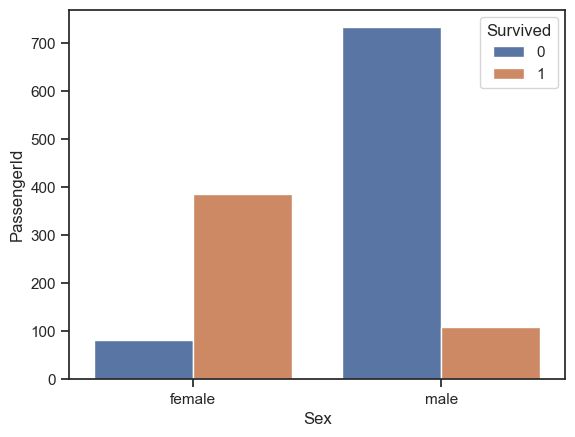

In [20]:
#Gender V Survival
gender_survived=pd.DataFrame(data.groupby(['Survived','Sex'])['PassengerId'].count().reset_index())
gender_survived

sns.barplot(x=gender_survived['Sex'],y=gender_survived['PassengerId'],hue=gender_survived["Survived"],data=surv)
plt.show()

In [21]:
gender_survived

,Survived,Sex,PassengerId
0,0,female,81
1,0,male,733
2,1,female,385
3,1,male,109


In [49]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Number,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,S,1,Adult
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,0,Adult
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,1,Adult
416,1308,0,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,S,1,Adult


In [22]:
# Amount and average age of women and man who survived compared to those who died.

age_avg=pd.DataFrame(data.groupby(['Sex','Survived']).agg({'Age':'mean','PassengerId':'count'}).reset_index())
age_avg

,Sex,Survived,Age,PassengerId
0,female,0,26.061473,81
1,female,1,29.481401,385
2,male,0,30.801940,733
3,male,1,27.658424,109


In [23]:
wom_surv=pd.DataFrame(data.groupby(['Sex'])['PassengerId'].count()).reset_index()
wom_surv['Perc']=(wom_surv['PassengerId']/wom_surv['PassengerId'].sum()*100).round(2)
wom_surv

,Sex,PassengerId,Perc
0,female,466,35.63
1,male,842,64.37


In [24]:
# Percentage of men and women who survived

men_women=age_avg[['Sex','Survived','PassengerId']].copy()
men_women
women=men_women.loc[men_women.Sex=='female',:]
men=men_women.loc[men_women.Sex=='male',:]
men
men['perc']=(men['PassengerId']/men['PassengerId'].sum()*100).round(2)
men
women['perc']=(women['PassengerId']/women['PassengerId'].sum()*100).round(2)
women

C:\Users\hp\AppData\Local\Temp\ipykernel_2412\3066504761.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men['perc']=(men['PassengerId']/men['PassengerId'].sum()*100).round(2)
C:\Users\hp\AppData\Local\Temp\ipykernel_2412\3066504761.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women['perc']=(women['PassengerId']/women['PassengerId'].sum()*100).round(2)


,Sex,Survived,PassengerId,perc
0,female,0,81,17.38
1,female,1,385,82.62


In [25]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Number,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,S,1,Adult
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,0,Adult
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,1,Adult
416,1308,0,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,S,1,Adult


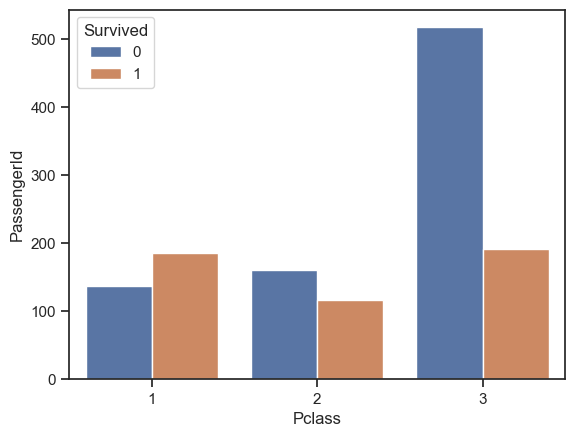

In [26]:
#Survived and pclass
class_surv=pd.DataFrame(data.groupby(['Pclass','Survived'])['PassengerId'].count().reset_index())
class_surv
sns.barplot(x=class_surv['Pclass'],y=class_surv['PassengerId'],hue=class_surv["Survived"],data=class_surv)
plt.show()

In [27]:
# Amount and average age of women and man who survived compared to those who died.

age_avg=pd.DataFrame(data.groupby(['Sex','Survived']).agg({'Age':'mean','PassengerId':'count'}).reset_index())
age_avg

,Sex,Survived,Age,PassengerId
0,female,0,26.061473,81
1,female,1,29.481401,385
2,male,0,30.801940,733
3,male,1,27.658424,109


In [28]:
# Amount and average age of women and man of each class who survived compared to those who died.
class_avg=pd.DataFrame(data.groupby(['Sex','Pclass','Survived']).agg({'Age':'mean','PassengerId':'count'}).reset_index())
class_avg

,Sex,Pclass,Survived,Age,PassengerId
0,female,1,0,25.666667,3
1,female,1,1,36.721224,141
2,female,2,0,36.000000,6
3,female,2,1,27.060634,100
4,female,3,0,25.249713,72
5,female,3,1,24.073496,144
6,male,1,0,40.543031,134
7,male,1,1,35.540571,45
8,male,2,0,32.189562,154
9,male,2,1,17.652487,17


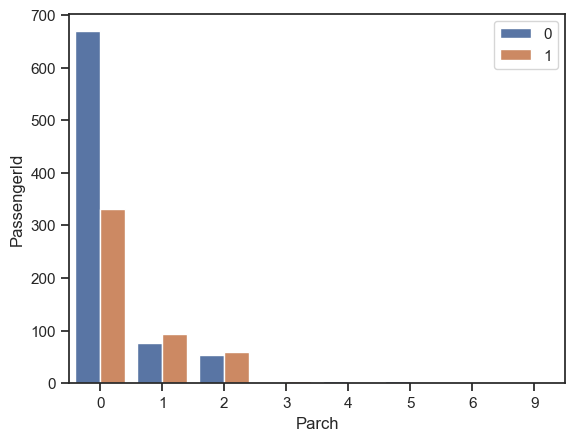

In [29]:
parch=pd.DataFrame(data.groupby(['Parch','Survived'])['PassengerId'].count()).reset_index()
parch
sns.barplot(x=parch['Parch'],y=parch['PassengerId'],hue=parch["Survived"],data=parch)
plt.legend(loc='upper right')

In [58]:
# Average age of people with parents or children
data
parch_age=data.loc[data['Parch']!=0]
parch_age_avg=parch_age.groupby(['Parch','Survived']).Age.agg([max,min,'mean'])
parch_age_avg

max        min       mean
Parch Survived                                 
1     0         70.000000   0.750000  26.770998
      1         64.000000   0.420000  23.999404
2     0         58.000000   0.330000  20.007616
      1         64.000000   0.170000  20.972743
3     0         61.000000  16.000000  41.666667
      1         54.000000  24.000000  37.200000
4     0         64.000000  29.000000  44.500000
      1         60.000000  29.881138  44.940569
5     0         41.000000  39.000000  39.600000
      1         38.000000  38.000000  38.000000
6     0         43.000000  40.000000  41.500000
9     0         29.881138  29.881138  29.881138
      1         29.881138  29.881138  29.881138

In [61]:
#Survived and SibSp
sibsp_age_avg=data.groupby(['SibSp','Survived']).Age.agg([max,min,'mean'])
sibsp_age_avg

max        min       mean
SibSp Survived                                 
0     0         74.000000   0.330000  31.112488
      1         80.000000   0.420000  29.724267
1     0         70.000000   0.750000  33.035116
      1         76.000000   0.170000  28.959347
2     0         44.000000   9.000000  24.723627
      1         59.000000   0.750000  24.165443
3     0         31.000000   2.000000  16.168303
      1         33.000000  23.000000  27.600000
4     0         16.000000   1.000000   7.222222
      1         38.000000   3.000000  15.750000
5     0         16.000000   1.000000  10.200000
      1         10.000000  10.000000  10.000000
8     0         29.881138  14.500000  27.958495
      1         29.881138  29.881138  29.881138

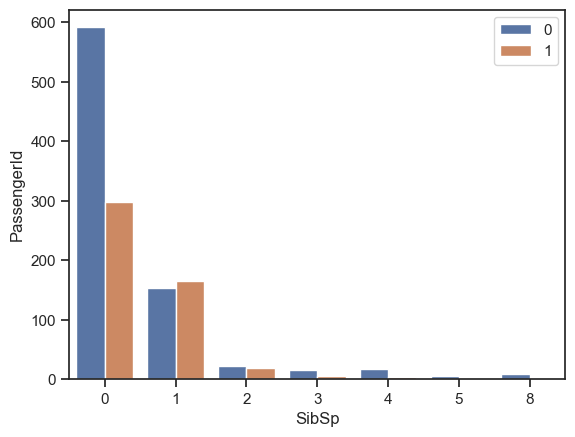

In [74]:
## This barplot compares the chance of survival within a category
sur_cat=pd.DataFrame(data.groupby(['SibSp','Survived'])['PassengerId'].count()).reset_index()
sur_cat
sns.barplot(x=sur_cat['SibSp'],y=sur_cat['PassengerId'],hue=sur_cat["Survived"],data=sur_cat)
plt.legend(loc='upper right')

In [75]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Number,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,S,1,Adult
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,0,Adult
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,1,Adult
416,1308,0,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,S,1,Adult


Text(0, 0.5, 'Average Age')

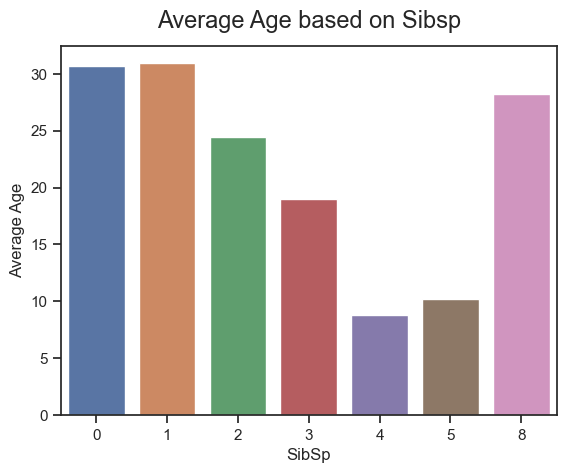

In [109]:
#Average Age based on Sibsp
sibsp_age=pd.DataFrame(data.groupby(['SibSp'])['Age'].mean()).reset_index()
sibsp_age
sns.barplot(x=sibsp_age['SibSp'],y=sibsp_age['Age'],data=sibsp_age)
plt.title("Average Age based on Sibsp", size=17,pad=13)
plt.ylabel("Average Age")

Text(0, 0.5, 'No. of Passengers')

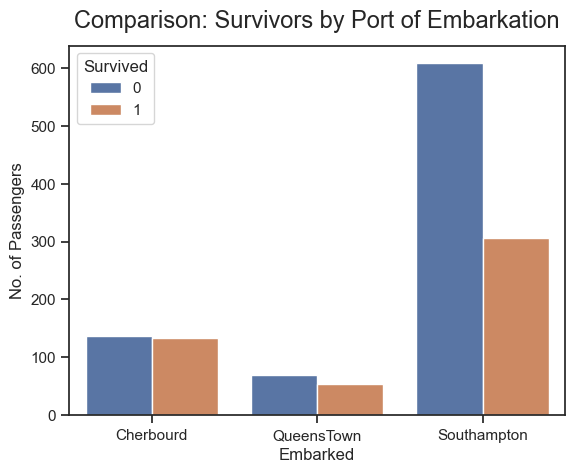

In [103]:
#Coparing Embarked and Survival
data.head()
emb_surv=pd.DataFrame(data.groupby(['Embarked','Survived'])['PassengerId'].count()).reset_index()
emb_surv
sns.barplot(x=emb_surv['Embarked'],y=emb_surv['PassengerId'],hue=emb_surv["Survived"],data=emb_surv)
plt.title("Comparison: Survivors by Port of Embarkation", size=17,pad=13)
plt.xticks([0,1,2],['Cherbourd','QueensTown','Southampton'])
plt.ylabel("No. of Passengers")

Text(0, 0.5, 'No. of Passengers')

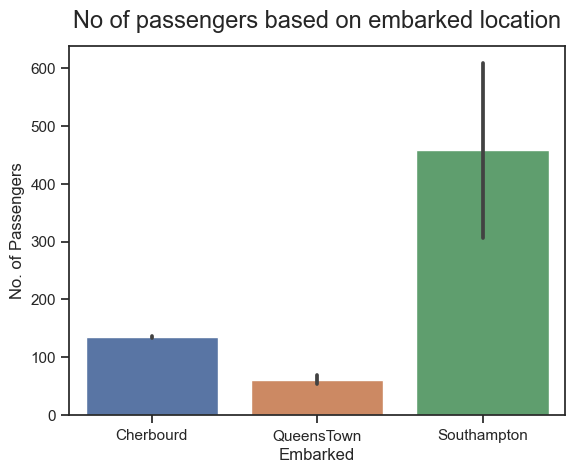

In [104]:
#No of passengers based on embarked location
sns.barplot(x=emb_surv['Embarked'],y=emb_surv['PassengerId'],data=emb_surv)

plt.title("No of passengers based on embarked location", size=17,pad=13)
plt.xticks([0,1,2],['Cherbourd','QueensTown','Southampton'])
plt.ylabel("No. of Passengers")

Text(0, 0.5, 'Average Age')

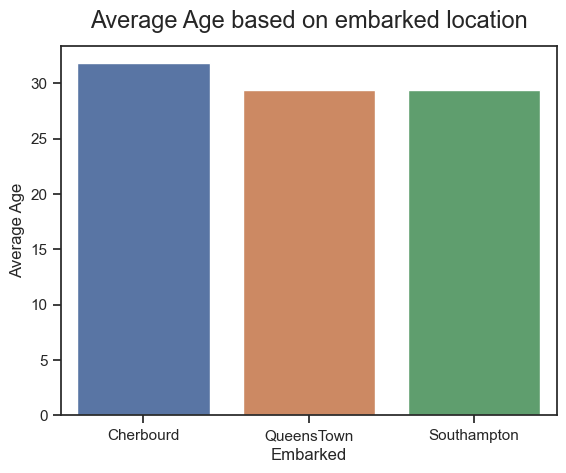

In [106]:
#Average Age based on embarked location#Average Age based on embarked location
data.head()
emb_age=pd.DataFrame(data.groupby(['Embarked'])['Age'].mean()).reset_index()
emb_age
sns.barplot(x=emb_age['Embarked'],y=emb_age['Age'],data=emb_age)

plt.title("Average Age based on embarked location", size=17,pad=13)
plt.xticks([0,1,2],['Cherbourd','QueensTown','Southampton'])
plt.ylabel("Average Age")

Text(0, 0.5, 'Age of passengers with parents or children')

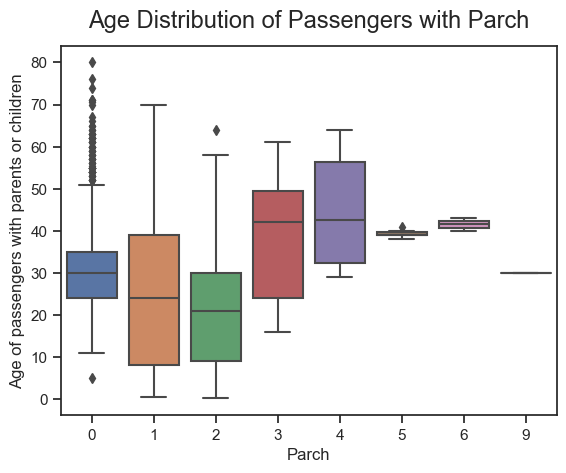

In [117]:
#Age of passengers with parents or children
data.head()
sns.boxplot(x=data['Parch'],y=data['Age'],data=data)

plt.title("Age Distribution of Passengers with Parch", size=17,pad=13)
plt.ylabel("Age of passengers with parents or children")


Text(0, 0.5, 'Age of passengers with parents or children')

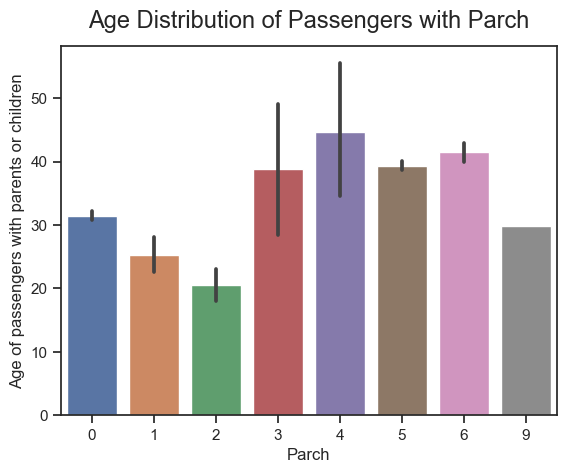

In [118]:
#Age of passengers with parents or children
data.head()
sns.barplot(x=data['Parch'],y=data['Age'],data=data)

plt.title("Age Distribution of Passengers with Parch", size=17,pad=13)
plt.ylabel("Age of passengers with parents or children")


In [120]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Number,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Adult


Text(0, 0.5, 'Age of passengers based on PClass')

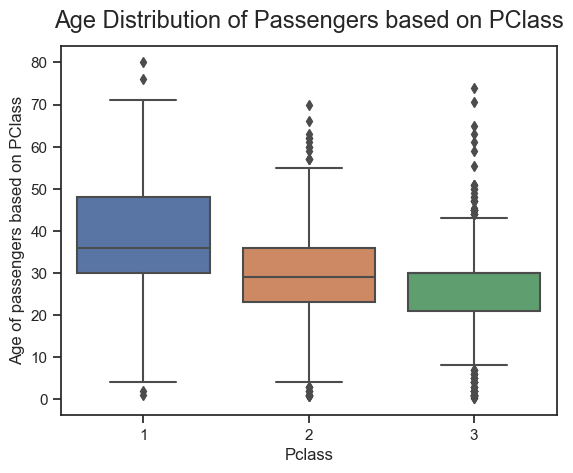

In [122]:
#Age of passengers based on Pclass
data.head()
sns.boxplot(x=data['Pclass'],y=data['Age'],data=data)

plt.title("Age Distribution of Passengers based on PClass", size=17,pad=13)
plt.ylabel("Age of passengers based on PClass")


In [ ]:
# Comparison of Pclass, Age, Sex and Survivors
a=sns.FacetGrid(data, col='')